In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 히트맵
import numpy as np
arr = np.random.standard_normal((5,5))
df = pd.DataFrame(arr)
df

,0,1,2,3,4
0,-1.568951,-0.960983,0.036894,-0.688007,-0.240808
1,0.051802,0.560849,0.243660,0.107614,-1.314617
2,-0.780310,-0.168086,1.104058,-0.631243,0.848203
3,-0.758017,-0.579902,1.036374,-1.172293,-1.680110
4,1.937514,-0.137180,1.769966,0.802199,0.493320


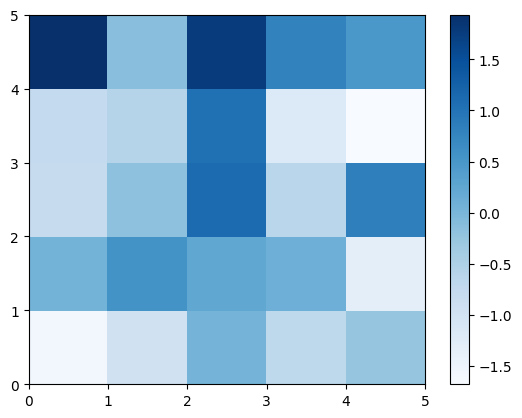

In [2]:
plt.pcolor(df, cmap='Blues')
plt.colorbar()

In [3]:
# 히트맵 예제
# 타이타닉호의 연령대_객실등급별_승선자수
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# 데이터전처리
# 결측치
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# 컬럼삭제
titanic=titanic.drop(columns=['deck'])

In [6]:
# 결측치 삭제
titanic = titanic.dropna()

In [7]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
titanic.shape

(712, 14)

In [10]:
# 연령대 컬럼 생성
titanic['agerange']=(titanic['age']/10).astype('int')*10

In [11]:
# 피봇테이블
titanic_pivot=titanic.pivot_table(index='class',columns='agerange',values='survived',aggfunc='count')
titanic_pivot

agerange,0,10,20,30,40,50,60,70,80
class,,,,,,,,,
First,3,18,34,49,37,27,12,3,1
Second,17,18,53,48,18,15,3,1,0
Third,42,66,133,69,34,6,3,2,0


In [12]:
len(titanic_pivot.columns)

9

In [13]:
titanic_pivot.columns

Int64Index([0, 10, 20, 30, 40, 50, 60, 70, 80], dtype='int64', name='agerange')

In [14]:
np.arange(0.5,len(titanic_pivot.columns),1)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])

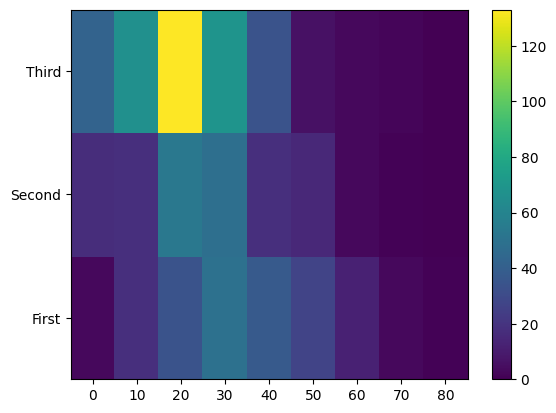

In [15]:
plt.pcolor(titanic_pivot)
plt.colorbar()

plt.xticks(np.arange(0.5,len(titanic_pivot.columns),1),labels=titanic_pivot.columns)
plt.yticks(np.arange(0.5,len(titanic_pivot.index),1),labels=titanic_pivot.index)
plt.show()

<AxesSubplot:xlabel='agerange', ylabel='class'>

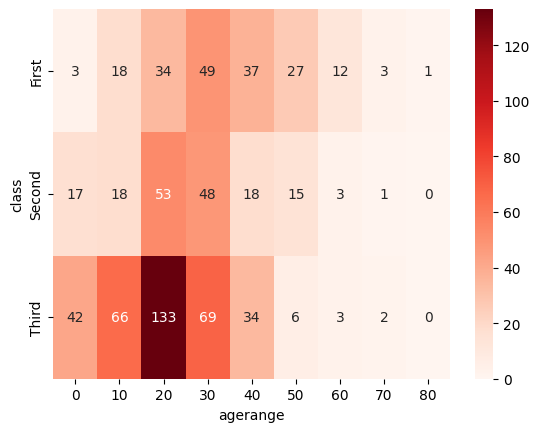

In [16]:
# seaborn으로 그려보기
sns.heatmap(titanic_pivot, cmap='Reds', annot=True, fmt='d')